# Stability function of a Runge-Kutta method

Recall that the [general form of a Runge-Kutta method](rk-definition) is

\begin{align*}
    y_{n+1}&=y_n + h \sum_{i=1}^s b_i k_i ,\\
    k_i &=f(t_n +c_i h,y_n +h\sum_{j=1}^s a_{ij} k_j ).
\end{align*}

Let $Y_i = y_n + h \displaystyle \sum_{j=1}^s a_{ij} k_i$ and applying the method to the test equation $y' = \lambda y$ we have

\begin{align*}
    y_{n+1} &=y_n +h\lambda \sum_{i=1}^s b_i Y_i ,\\
    Y_i &=y_n +h\lambda \sum_{j=1}^s a_{ij} Y_j .
\end{align*}

Let $z = h\lambda$ and expanding out the summations in the stage values

\begin{align*}
    Y_1 &=y_n +z(a_{11} Y_1 + a_{12} Y_2 + \cdots + a_{1s} Y_s),\\
    Y_2 &=y_n +z(a_{21} Y_1 + a_{22} Y_2 + \cdots + a_{2s} Y_s),\\
    &\vdots \\
    Y_s &=y_n +z(a_{s1} Y_1 + a_{s2} Y_2 + \cdots + a_{ss} Y_s).
\end{align*}

We can write these as the matrix equation

\begin{align*}
    \begin{pmatrix} Y_1 \\ Y_2 \\ \vdots \\ Y_s \end{pmatrix} = 
    \begin{pmatrix} y_n \\ y_n \\ \vdots \\ y_n \end{pmatrix}
    + z
    \begin{pmatrix}
        a_{11} & a_{12} & \cdots & a_{1s} \\
        a_{21} & a_{22} & \cdots & a_{2s} \\
        \vdots & \vdots & \ddots & \vdots \\
        a_{s1} & a_{s2} & \cdots & a_{ss}
    \end{pmatrix} 
    \begin{pmatrix} Y_1 \\ Y_2 \\ \vdots \\ Y_s \end{pmatrix}.
\end{align*}


Let $Y=(Y_1 ,Y_2 ,\dots ,Y_s )^T$ and $\mathbf{e}=(1,1,\dots ,1)^T$ then

```{math}
:label: rk-stability-Y-equation

Y = \mathbf{e} y_n + z A Y.
```

Expanding the summation in the equation for updating the solution over a single step and using $z = h \lambda$ gives

\begin{align*}
    y_{n+1} = y_n + z (b_1 Y_1 + b_2 Y_2 + \cdots + b_s Y_s),
\end{align*}

which can be written as the matrix equation

\begin{align*}
    y_{n+1} = y_n + z
    \begin{pmatrix}
        b_1 & b_2 & \cdots & b_s 
    \end{pmatrix}
    \begin{pmatrix}
        Y_1 \\ Y_2 \\ \vdots \\ Y_s
    \end{pmatrix}. 
\end{align*}

Since $\mathbf{b}$ is a column vector then the vector form of a Runge-Kutta method for solving the test equation $y' = \lambda y$ is

```{math}
:label: rk-stability-yn+1-equation
y_{n+1} =y_n + z \mathbf{b}^T Y.
```

The stability functions for explicit and implicit Runge-Kutta methods are derived using different approaches.

(erk-rz-section)=
## Stability function of an explicit Runge-Kutta method

To derive the stability function of an explicit Runge-Kutta method we rearrange equation {eq}`rk-stability-Y-equation`

\begin{align*}
    Y - zAY &= \mathbf{e}y_n \\
    (I - zA)Y &= \mathbf{e}y_n\\
    Y&= (I-zA)^{-1} \mathbf{e}y_n,
\end{align*}

and substituting into {eq}`rk-stability-yn+1-equation` gives

\begin{align*}
    y_{n+1} &= y_n +z\mathbf{b}^T (I-zA)^{-1} \mathbf{e} y_n \\
    &= (1 + z \mathbf{b}^T (I - zA)^{-1} \mathbf{e})y_n ,
\end{align*}

so the stability function is

\begin{align*}
    R(z)=1 + z\mathbf{b}^T (I - zA)^{-1} \mathbf{e}
\end{align*}

Using the geometric series of matrices

\begin{align*}
    (I - zA)^{-1} = \sum_{k=0}^{\infty} (zA)^k 
\end{align*}

gives the following definition for the stability function of an explicit method.

````{admonition} Definition: Stability function of an explicit Runge-Kutta method
:class: note
:name: erk-rz-definition

```{math}
:label: erk-stability-rz-equation

R(z)=1+\sum_{k=0}^{\infty} \mathbf{b}^T A^k \mathbf{e}\,z^{k+1} =1+\mathbf{b}^T \mathbf{e}\,z+\mathbf{b}^T A\mathbf{e}\,z^2 +\mathbf{b}^T A^2 \mathbf{e}\,z^3 + \cdots
```
````

Since the solution to the test equation is $y=e^{\lambda t}$, over one step of an explicit Runge-Kutta method we would expect the local truncation errors to change at a rate of $e^z$. The series expansion of $e^z$ is

```{math}
:label: erk-stability-exp(z)-equation

e^z = \sum_{k=0}^{\infty} \frac{1}{k!} z^k = 1 + z + \frac{1}{2!}z^2 + \frac{1}{3!}z^3 + \frac{1}{4!}z^4 + \cdots
```

Comparing the coefficients of $z^k$ in equations {eq}`erk-stability-rz-equation` and {eq}`erk-stability-exp(z)-equation` we have

\begin{align*}
    \frac{1}{k!}= \mathbf{b}^T A^{k-1} \mathbf{e},
\end{align*}

which must be satisfied up to the $k$th term for an order $k$ explicit method to be stable. The stability functions for the explicit Runge-Kutta methods or order 1 -- 4 have been plotted in {numref}`erk-stability-regions-figure`.

```{glue:figure} erk-stability-regions-plot
:name: erk-stability-regions-figure
Regions of absolute stability for explicit Runge-Kutta methods of order 1 to 4.
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate z values
X, Y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
Z = X + Y * 1j

# Define stability functions
Euler = 1 + Z
RK2 = Euler + Z ** 2 / 2
RK3 = RK2 + Z ** 3 / 6
RK4 = RK3 + Z ** 4 / 24

# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(RK4), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(RK4), colors= "k", levels=[0, 1])
plt.contourf(X, Y, abs(RK3), levels=[0, 1], colors="#ffcccc")
plt.contour(X, Y, abs(RK3), colors= "k", levels=[0, 1])
plt.contourf(X, Y, abs(RK2), levels=[0, 1], colors="#ccffcc")
plt.contour(X, Y, abs(RK2), colors= "k", levels=[0, 1])
plt.contourf(X, Y, abs(Euler), levels=[0, 1], colors="#ffffcc")
plt.contour(X, Y, abs(Euler), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=2)
plt.axvline(0, color="k", linewidth=2)
plt.axis([-4, 2, -3.5, 3.5])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.annotate("RK4", xy=(-1.5, 2.2), xytext=(-2, 3), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("RK3", xy=(-2, 1.2), xytext=(-3, 2), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("RK2", xy=(-2, 0.5), xytext=(-3.5, 1.2), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("Euler", xy=(-1.5, -0.9), xytext=(-2.5, -2.5), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.show()


from myst_nb import glue
glue("erk-stability-regions-plot", fig, display=False)

fig.savefig("../Images/ERK_stability.png", dpi=fig.dpi)

ModuleNotFoundError: No module named 'numpy'

`````{admonition} Example 4.2
:class: seealso
:name: erk-stability-example

An explicit Runge-Kutta method is defined by the following Butcher tableau

\begin{align*}\begin{array}{c|cccc}
0 &  &  &  & \\
\frac{1}{2} & \frac{1}{2} &  &  & \\
\frac{3}{4} & 0 & \frac{3}{4} &  & \\
1 & \frac{2}{9} & \frac{1}{3} & \frac{4}{9} & \\ 
\hline
& \frac{7}{24} & \frac{1}{4} & \frac{1}{3} & \frac{1}{8}
\end{array}\end{align*}

(i) Determine the stability function for this Runge-Kutta method and hence find its order;

````{dropdown} Solution

Here we have
\begin{align*}
    A &= \begin{pmatrix}
        0 & 0 & 0 & 0 \\
        \frac{1}{2} & 0 & 0 & 0 \\
        0 & \frac{3}{4} & 0 & 0 \\
        \frac{2}{9} & \frac{1}{3} & \frac{4}{9} & 0
    \end{pmatrix}, &
    \mathbf{b} &= \begin{pmatrix} \frac{7}{24} \\ \frac{1}{4} \\ \frac{1}{3} \\ \frac{1}{8} \end{pmatrix}.
\end{align*}

Calculating $\mathbf{b}^TA^{k - 1}\mathbf{e}$ for $h = 1 \ldots 4$

\begin{align*}
    k &= 1, & \mathbf{b}^TA^0 \mathbf{e} &= 
    \begin{pmatrix} \frac{7}{24} & \frac{1}{4} & \frac{1}{3} & \frac{1}{8} \end{pmatrix}
    \begin{pmatrix} 
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 1 
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} = 1, \\
    k &= 2, & \mathbf{b}^TA^1 \mathbf{e} &= 
    \begin{pmatrix} \frac{7}{24} & \frac{1}{4} & \frac{1}{3} & \frac{1}{8} \end{pmatrix}
    \begin{pmatrix}
        0 & 0 & 0 & 0 \\
        \frac{1}{2} & 0 & 0 & 0 \\
        0 & \frac{3}{4} & 0 & 0 \\
        \frac{2}{9} & \frac{1}{3} & \frac{4}{9} & 0
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} 
    = \frac{1}{2}, \\
    k &= 3, & \mathbf{b}^TA^2 \mathbf{e} &= 
    \begin{pmatrix} \frac{7}{24} & \frac{1}{4} & \frac{1}{3} & \frac{1}{8} \end{pmatrix}
    \begin{pmatrix}
        0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 \\
        \frac{3}{8} & 0 & 0 & 0 \\
        \frac{1}{6} & \frac{1}{3} & 0 & 0
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} 
    = \frac{3}{16}, \\
    k &= 4, & \mathbf{b}^TA^3 \mathbf{e} &= 
    \begin{pmatrix} \frac{7}{24} & \frac{1}{4} & \frac{1}{3} & \frac{1}{8} \end{pmatrix}
    \begin{pmatrix}
        0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 \\
        \frac{1}{6} & 0 & 0 & 0
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} 
    = \frac{1}{48}.
\end{align*}

So the stability function is

\begin{align*}
    R(z) = 1 + z + \frac{1}{2} z^2 + \frac{3}{16} z^3 + \frac{1}{48} z^4,
\end{align*}

which agrees to the series expansion of $e^z$ from equation {eq}`erk-stability-exp(z)-equation` up to and including the $z^2$ term. Therefore this method is of order 2.
````
(ii) plot the region of absolute stability and that of an explicit method on the same order on the same set of axes;

````{dropdown} Solution

```python
import numpy as np
import matplotlib.pyplot as plt

# Generate z values
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = X + Y * 1j

# Define stability function
ERK = 1 + Z + Z ** 2 / 2 + 3 * Z ** 3 / 16 + Z ** 4 / 48 
RK2 = 1 + Z + Z ** 2 / 2

# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(ERK), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(ERK), colors= "k", levels=[0, 1])
plt.contourf(X, Y, abs(RK2), levels=[0, 1], colors="#ffcccc")
plt.contour(X, Y, abs(RK2), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=2)
plt.axvline(0, color="k", linewidth=2)
plt.axis([-5, 2, -3.5, 3.5])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.show()
```

```{glue:} erk-stability-regions-example-plot
```

````

(iii) comment on the region of absolute stability of the two methods.

````{dropdown} Solution
The interval of absolute stability for this method is $[-3,0]$ whereas for the second-order method we have $[-2,0]$. This means that this method is stable for larger values of $h$ so we can use fewer steps than the second-order method to calculate the solution to the same accuracy, although it does require the calculation of two additional stage values.
````

`````

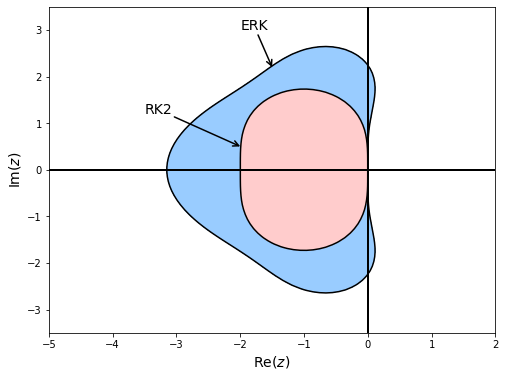

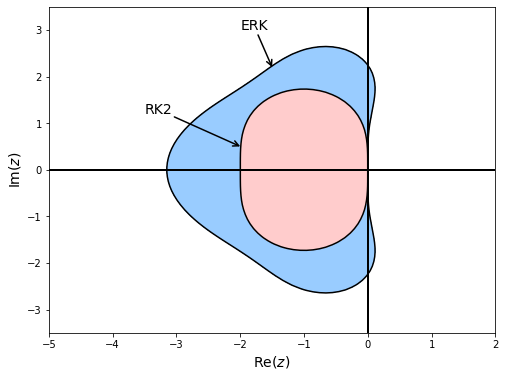

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate z values
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = X + Y * 1j

# Define stability function
ERK = 1 + Z + Z ** 2 / 2 + 3 * Z ** 3 / 16 + Z ** 4 / 48 
RK2 = 1 + Z + Z ** 2 / 2

# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(ERK), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(ERK), colors= "k", levels=[0, 1])
plt.contourf(X, Y, abs(RK2), levels=[0, 1], colors="#ffcccc")
plt.contour(X, Y, abs(RK2), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=2)
plt.axvline(0, color="k", linewidth=2)
plt.axis([-5, 2, -3.5, 3.5])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.annotate("ERK", xy=(-1.5, 2.2), xytext=(-2, 3), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("RK2", xy=(-2, 0.5), xytext=(-3.5, 1.2), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.show()

from myst_nb import glue
glue("erk-stability-regions-example-plot", fig, display=False)

## Python code

The code below calculates the coefficients of the stability function for the explicit Runge-Kutta method from [example  4.2](erk-stability-example).

In [3]:
from sympy import *
from IPython.display import display, Math

# Define ERK method
A = Matrix([[0, 0, 0, 0], 
            [Rational(1,2), 0, 0, 0], 
            [0, Rational(3,4), 0, 0], 
            [Rational(2,9), Rational(1,3), Rational(4,9), 0]])
b = Matrix([[Rational(7,24)], [Rational(1,4)], [Rational(1,3)], [Rational(1,8)]])
e = ones(4, 1)

# Calculate stability function
string = "R(z) = 1"
for k in range(len(b)):
    coefficient = b.T * A ** k * e
    string += f" + {latex(coefficient[0])} z^{k+1}"

display(Math(string))

<IPython.core.display.Math object>